# PRODIGY_ML_02

Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

### Libraries

In [125]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [126]:
data = pd.read_csv("C:\\Users\\KARTHIK\\OneDrive\\Desktop\\RESUME\\Mall_Customers.csv")

In [127]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Preprocessing

In [207]:
# select the features

x = data[['Annual Income (k$)','Spending Score (1-100)']]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [208]:
# standardize the data

# we need to standardize the data.
# Because one data is smaller range and one is in larger range.

scale = StandardScaler()
Scaled_x = scale.fit_transform(x)


Scaled_x[0:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [209]:
# We dont know which k is optimal for this data.
# therefore we use elbow method to identify it

# wcss - Within-Cluster Sum of Squares
# WCSS is the sum of squared distances between each point and 
# the centroid of the cluster to which it belongs.
# It is also known as the "inertia" in the context of the sklearn library.


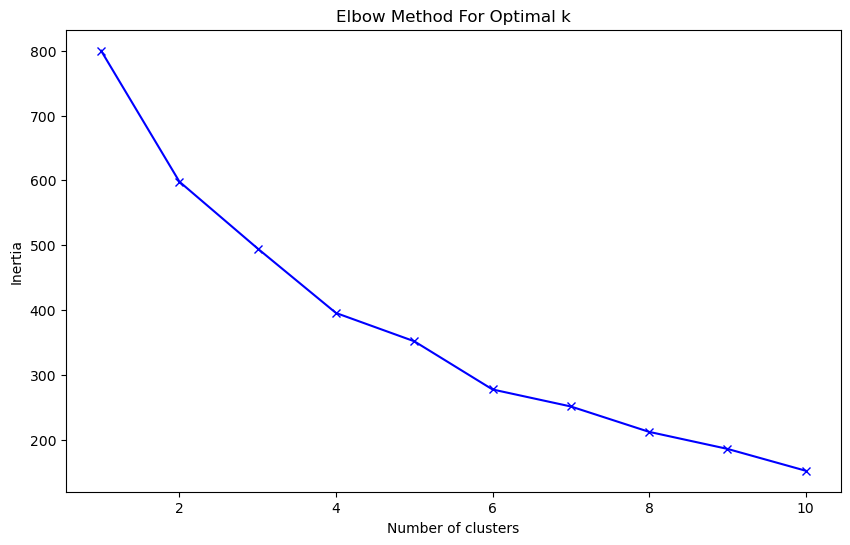

In [210]:
# Use the elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

### We can clearly see that from the point k=5. The graph is slowly decreasing. therefore we take k=5 as optimal.

### Modeling

In [211]:
k_means = KMeans(n_clusters=5,random_state=42,n_init=10)
clusters = k_means.fit_predict(Scaled_x)

In [212]:
data['Cluster'] = clusters
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


In [213]:
data.groupby('Cluster').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,86.320988,0.407407,42.716049,55.296296,49.518519
1,162.000000,0.461538,32.692308,86.538462,82.128205
2,23.090909,0.409091,25.272727,25.727273,79.363636
3,164.371429,0.542857,41.114286,88.200000,17.114286
4,23.000000,0.391304,45.217391,26.304348,20.913043


In [214]:
#cluster centroids

kmeans_centers = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().values
kmeans = KMeans(n_clusters=len(kmeans_centers), random_state=42)
kmeans.cluster_centers_ = kmeans_centers

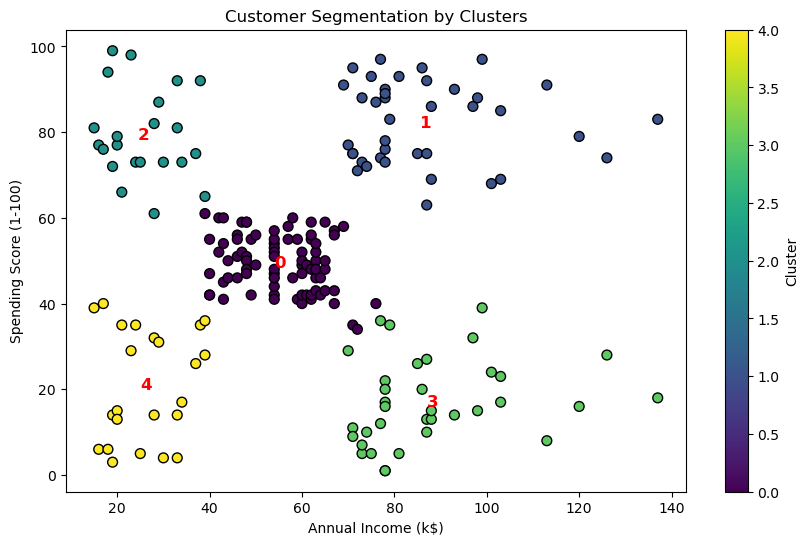

In [215]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation by Clusters')
plt.colorbar(label='Cluster')

for i, center in enumerate(kmeans.cluster_centers_):
    plt.text(center[0], center[1], str(i), fontsize=12, color='red', ha='center', va='center', fontweight='bold')

plt.show()

### Interpretation :

1. Cluster 0:
        * Annual Income: Approx $55,300
        * Spending Score(1-100): 49.5
        * Customers in this cluster have a moderate annual income and a moderate spending score.

2. Cluster 1:
        * Annual Income: Approx $86,500
        * Spending Score(1-100): 82.1
        * Customers in this cluster have a high annual income and a high spending score. 

3. Cluster 2:
        * Annual Income: Approx $25,700
        * Spending Score(1-100): 79.4
        * Customers in this cluster have a low annual income but a high spending score.

4. Cluster 3:
        * Annual Income: Approx $88,200
        * Spending Score(1-100): 17.1
        * Customers in this cluster have a high annual income but a low spending score.

5. Cluster 4:
        * Annual Income: Approx $26,300
        * Spending Score(1-100): 20.9
        * Customers in this cluster have a low annual income and a low spending score.

### Conclusion :

1. Cluster 0: Moderate income and spending. Target with value-for-money products.  

2. Cluster 1: High income and spending. Focus on premium, luxury offerings.

3. Cluster 2: Low income but high spending. Attract with budget-friendly luxury deals.  

4. Cluster 3: High income but low spending. Emphasize quality, savings, and long-term benefits.  

5. Cluster 4: Low income and low spending. Provide affordable essentials and cost-effective solutions.  